In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [2]:
# Load and process the Brent oil price data
def load_and_process_data(file_path):
    """
    Load data and process the date and price columns.
    """
    # Load data
    df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
    df = df.sort_values(by='Date')
    
    # Ensure there are no missing values
    df = df.dropna(subset=['Price'])
    df.set_index('Date', inplace=True)
    
    return df

file_path = 'C:/Users/Administrator/Documents/kifiya/Week_10/data/BrentOilPrices.csv'
df = load_and_process_data(file_path)
display(df.head())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2816\2998849531.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


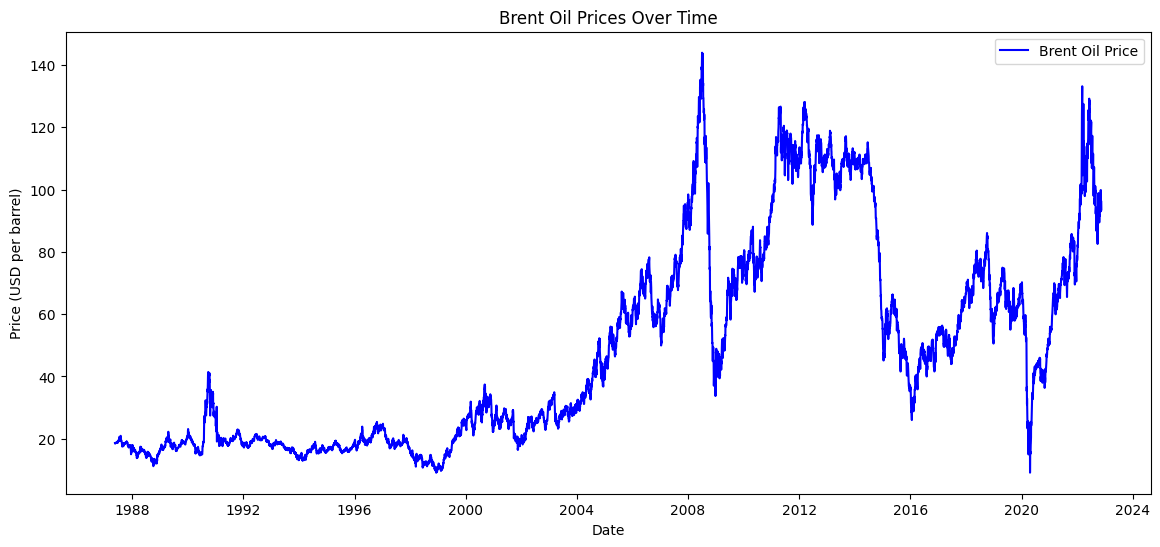

In [3]:

# Exploratory Data Analysis (EDA)
def plot_time_series(df):
    """
    Plot the time series of Brent oil prices and calculate basic stats.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Price'], color='blue', label='Brent Oil Price')
    plt.title("Brent Oil Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD per barrel)")
    plt.legend()
    plt.show()
 
plot_time_series(df)

In [11]:
def check_stationarity(df, column='Price'):
    """
    Perform the Augmented Dickey-Fuller test for stationarity.
    """
    result = adfuller(df[column])
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary. Differencing may be needed.")


# Summary statistics
print("Descriptive statistics of Brent Oil Prices:")
display(df['Price'].describe())
check_stationarity(df)


Descriptive statistics of Brent Oil Prices:


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
The data is non-stationary. Differencing may be needed.


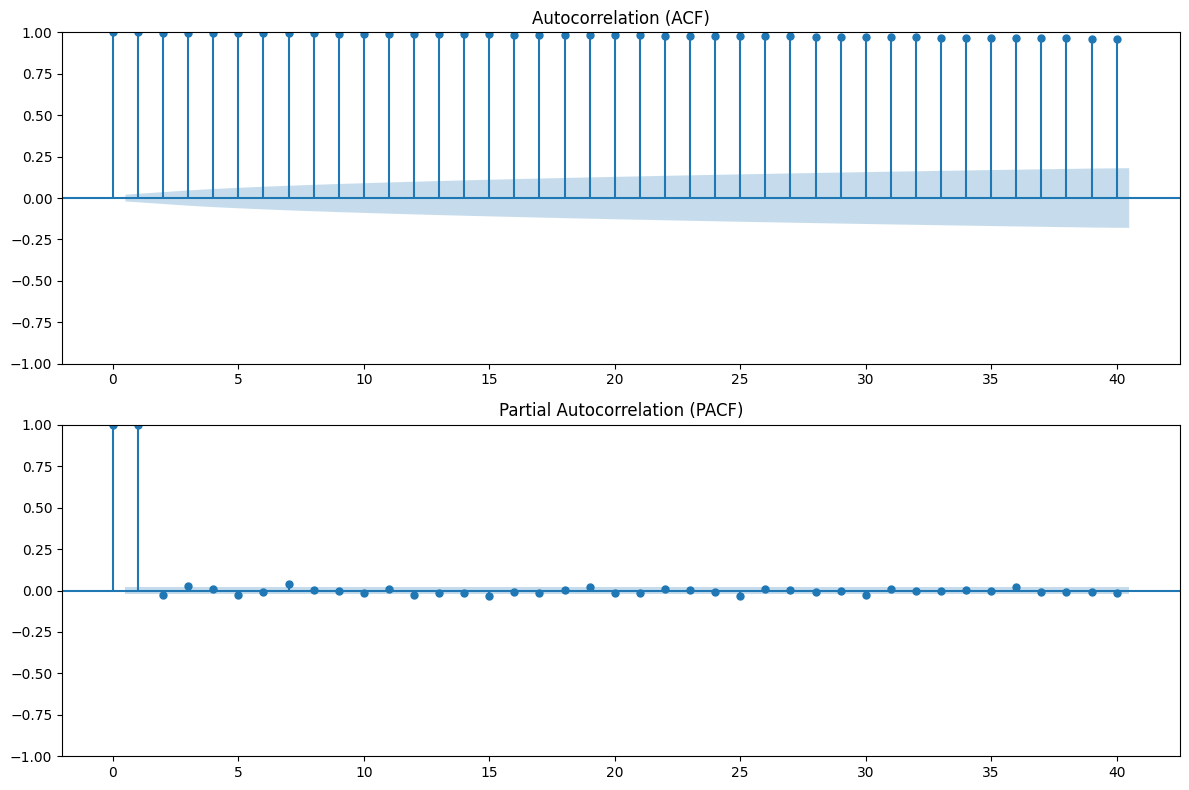

In [5]:
 # Step 1: EDA and Initial Analysis
def plot_acf_pacf(df, column='Price'):
    """
    Plot ACF and PACF for time series analysis.
    """
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(df[column], ax=ax[0])
    plot_pacf(df[column], ax=ax[1])
    ax[0].set_title("Autocorrelation (ACF)")
    ax[1].set_title("Partial Autocorrelation (PACF)")
    plt.tight_layout()
    plt.show()


plot_acf_pacf(df)

In [6]:
# Define ARIMA Model
def arima_model(df, column='Price', p=1, d=1, q=1):
    """
    Fit ARIMA model and print summary.
    """
    model = ARIMA(df[column], order=(p, d, q))
    arima_result = model.fit()
    print(arima_result.summary())
    return arima_result

# Step 2: Model the data with ARIMA and GARCH
print("Fitting ARIMA model...")
arima_result = arima_model(df)

Fitting ARIMA model...


c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Administrator\miniconda3\envs\jojo\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Sat, 02 Nov 2024   AIC                          29093.899
Time:                        10:54:08   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

In [7]:
# Define GARCH Model
def garch_model(df, column='Price'):
    """
    Fit GARCH model to capture volatility.
    """
    model = arch_model(df[column], vol='Garch', p=1, q=1)
    garch_result = model.fit(disp="off")
    print(garch_result.summary())
    return garch_result

print("Fitting GARCH model for volatility analysis...")
garch_result = garch_model(df)


Fitting GARCH model for volatility analysis...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35221.8
Distribution:                  Normal   AIC:                           70451.5
Method:            Maximum Likelihood   BIC:                           70479.9
                                        No. Observations:                 9011
Date:                Sat, Nov 02 2024   Df Residuals:                     9010
Time:                        10:54:14   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5742  

In [8]:
# Event Data Preparation
def create_event_dataframe():
    """
    Create a DataFrame for significant events related to oil price changes.
    """
    events_data = [
        {"Date": "1987-01-01", "Event": "Market Liberalization", "Type": "Economic"},
        {"Date": "1990-08-02", "Event": "Gulf War", "Type": "Geopolitical"},
        {"Date": "1992-01-01", "Event": "OPEC Production Agreements", "Type": "OPEC"},
        {"Date": "1997-01-01", "Event": "Asian Financial Crisis", "Type": "Economic"},
        {"Date": "2000-03-01", "Event": "Dot-com Bubble Burst", "Type": "Economic"},
        {"Date": "2001-09-11", "Event": "September 11 Attacks", "Type": "Geopolitical"},
        {"Date": "2003-03-01", "Event": "Iraq War", "Type": "Geopolitical"},
        {"Date": "2004-01-01", "Event": "Rising Demand from China", "Type": "Demand"},
        {"Date": "2005-08-01", "Event": "Hurricane Katrina", "Type": "Natural Disaster"},
        {"Date": "2008-07-01", "Event": "Global Economic Growth", "Type": "Economic"},
        {"Date": "2008-09-01", "Event": "Global Financial Crisis", "Type": "Economic"},
        {"Date": "2009-01-01", "Event": "OPEC Production Cuts", "Type": "OPEC"},
        {"Date": "2010-01-01", "Event": "Arab Spring", "Type": "Geopolitical"},
        {"Date": "2011-01-01", "Event": "U.S. Shale Boom", "Type": "Production"},
        {"Date": "2011-01-01", "Event": "Sanctions on Iran", "Type": "Sanctions"},
        {"Date": "2014-11-01", "Event": "OPEC's Decision Not to Cut Production", "Type": "OPEC"},
        {"Date": "2016-01-01", "Event": "Iran Nuclear Deal", "Type": "Geopolitical"},
        {"Date": "2016-01-01", "Event": "OPEC Production Cuts", "Type": "OPEC"},
        {"Date": "2017-01-01", "Event": "Geopolitical Tensions", "Type": "Geopolitical"},
        {"Date": "2018-10-01", "Event": "U.S. Sanctions on Iran", "Type": "Sanctions"},
        {"Date": "2019-09-01", "Event": "Attacks on Saudi Oil Facilities", "Type": "Geopolitical"},
        {"Date": "2020-04-01", "Event": "COVID-19 Pandemic", "Type": "Pandemic"},
        {"Date": "2020-04-20", "Event": "Negative Oil Prices", "Type": "Economic"},
        {"Date": "2021-01-01", "Event": "Market Recovery Post-COVID", "Type": "Economic"},
        {"Date": "2021-01-01", "Event": "Rising Inflation and Supply Chain Issues", "Type": "Economic"},
        {"Date": "2022-02-01", "Event": "Russia-Ukraine War", "Type": "Geopolitical"},
        {"Date": "2022-12-01", "Event": "EU Sanctions on Russian Oil", "Type": "Sanctions"},
        {"Date": "2023-01-01", "Event": "Continued Energy Transition", "Type": "Energy Transition"},
        {"Date": "2023-01-01", "Event": "Global Economic Uncertainty", "Type": "Economic"},
        {"Date": "2023-01-01", "Event": "OPEC+ Production Adjustments", "Type": "OPEC"},
        {"Date": "2023-01-01", "Event": "Geopolitical Tensions in Asia", "Type": "Geopolitical"},
        {"Date": "2023-01-01", "Event": "Natural Disasters and Climate Events", "Type": "Natural Disaster"},
        {"Date": "2023-01-01", "Event": "Technological Innovations in Energy", "Type": "Technology"},
        {"Date": "2023-01-01", "Event": "Speculative Trading and Financial Markets", "Type": "Economic"}
    ]
    
    events_df = pd.DataFrame(events_data)
    events_df['Date'] = pd.to_datetime(events_df['Date'])
    return events_df

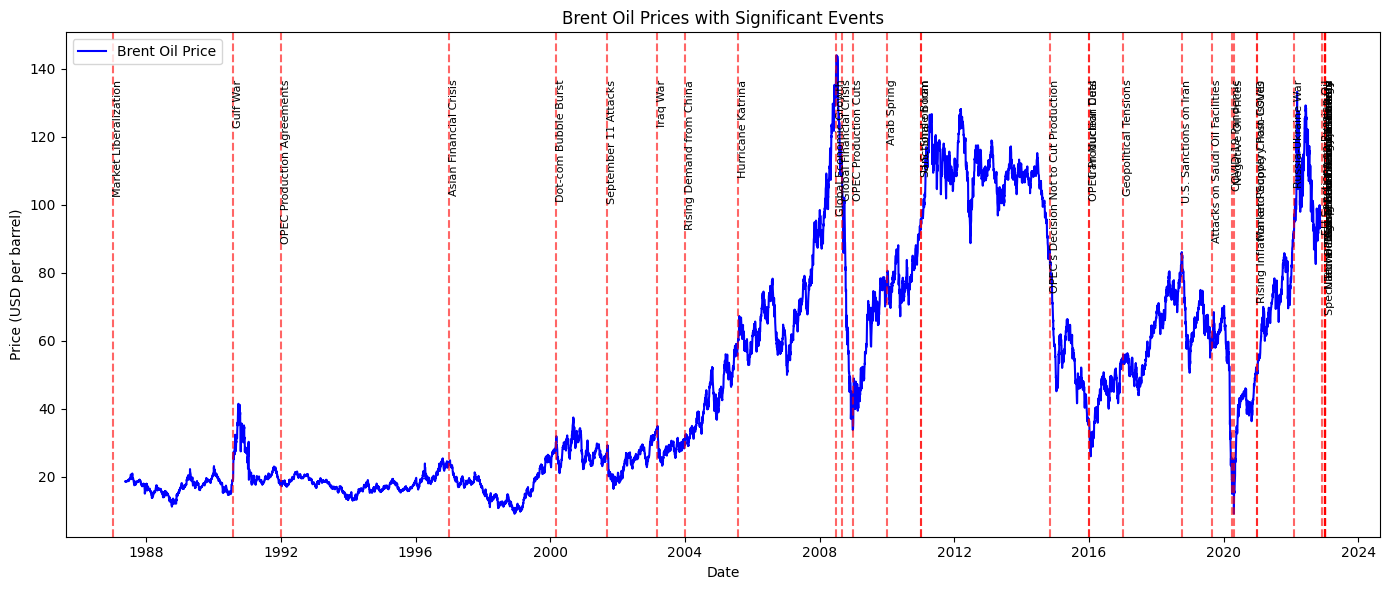

In [9]:
def plot_with_events(df, events_df):
    """
    Overlay events on the Brent oil price timeline.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
    
    for _, row in events_df.iterrows():
        plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.6)
        plt.text(row['Date'], df['Price'].max() * 0.95, row['Event'], rotation=90, verticalalignment='top', fontsize=8)
    
    plt.title("Brent Oil Prices with Significant Events")
    plt.xlabel("Date")
    plt.ylabel("Price (USD per barrel)")
    plt.legend()
    plt.tight_layout()
    plt.show()


 # Step 3: Overlay events on the time series
events_df = create_event_dataframe()
plot_with_events(df, events_df)